# Strategy Class

In [1]:
### Main libraries
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
from coinapi_rest_v1 import CoinAPIv1
from logins import CoinAPI_KEY
from robin_helperfunctions import round_to_hour
from talib import MACD

from robinhoodstrategy import cryptoStrategy, BackcastStrategy, Trade

___
### Testing

In [2]:
test_strategy = cryptoStrategy('MACD')

In [3]:
def entry_exit_func(hist_data, position_flag, trade=None):
    
    # MACD
    fast = 12
    slow = 26
    signal = 9
    macd, macdsignal, macdhist = MACD(hist_data['close'], fast, slow, signal)
    macd_current = macd[-1]
    signal_current = macdsignal[-1]

    
    if position_flag:
        if macd_current <= signal_current:
            return 'sell'
        else:
            return 'pass'
    elif macd_current > signal_current:
            return 'buy'
    else:
        return 'pass'
test_strategy.add_entryExit_conditions(entry_exit_func)

In [40]:
backtest = BackcastStrategy(test_strategy)
backtest.set_parameters(1000, 'XETHZUSD', '240', 1, 39)
backtest.run_backcast()

Running backcast. Staring with $1000


In [41]:
backtest.trades

,trade_start,trade_end,peirods,time_held,buy_price,sell_price,pct_change,current_capital
0,2020-08-03 03:00:00-05:00,2020-08-03 11:00:00-05:00,1,0 days 08:00:00,391.31,394.24,0.007488,1007.487670
1,2020-08-08 19:00:00-05:00,2020-08-11 11:00:00-05:00,15,2 days 16:00:00,395.51,380.27,-0.038533,968.666623
2,2020-08-12 19:00:00-05:00,2020-08-15 23:00:00-05:00,18,3 days 04:00:00,394.74,427.16,0.082130,1048.223222
3,2020-08-20 11:00:00-05:00,2020-08-21 07:00:00-05:00,4,0 days 20:00:00,414.45,404.33,-0.024418,1022.627809
4,2020-08-22 15:00:00-05:00,2020-08-25 11:00:00-05:00,16,2 days 20:00:00,395.52,379.24,-0.041161,980.535422
5,2020-08-28 03:00:00-05:00,2020-09-02 03:00:00-05:00,29,5 days 00:00:00,393.47,442.30,0.124101,1102.220798
6,2020-09-06 11:00:00-05:00,2020-09-13 03:00:00-05:00,39,6 days 16:00:00,353.15,372.30,0.054226,1161.990098
7,2020-09-16 23:00:00-05:00,2020-09-19 19:00:00-05:00,16,2 days 20:00:00,380.13,381.21,0.002841,1165.291467
8,2020-09-24 03:00:00-05:00,2020-09-27 19:00:00-05:00,21,3 days 16:00:00,338.24,351.90,0.040386,1212.352374
9,2020-09-30 11:00:00-05:00,2020-10-01 15:00:00-05:00,6,1 days 04:00:00,355.70,353.00,-0.007591,1203.149812


In [42]:
backtest.backcast_results()


                # Wins: 11

                Average Win: 0.07690157983551837

                # Losses: 9

                Average Loss: -0.02003330348408191

                Win %: 0.55

                Overall return: 843.1870261341953

                Percent return: 0.8431870261341953

                


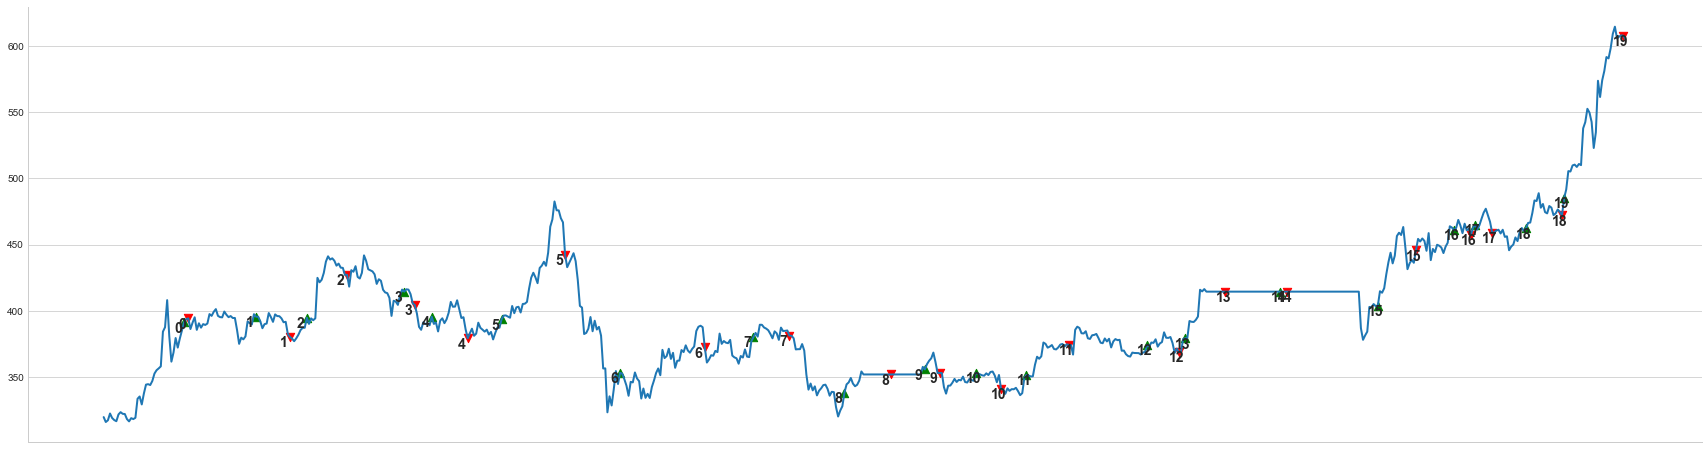

In [43]:
backtest.plot_trades()

___